In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 동행복권 로또 회차별 당첨번호
    https://dhlottery.co.kr/gameResult.do?method=byWin
    데이터 : 1 - 1024 회차 당첨번호


- ## 데이터 전처리
    xlsx 파일을 csv 파일로 변환, </br>
    필요없는 컬럼 삭제

In [2]:
df = pd.read_excel('lotto.xlsx', engine='openpyxl')
df

,회차별 추첨결과,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,년도,회차,추첨일,1등,NaN,2등,NaN,3등,NaN,4등,NaN,5등,NaN,당첨번호,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2.0,3.0,4.0,5.0,6.0,보너스
2,2022,1024,2022.07.16,8,"3,020,323,500원",63,"63,922,191원",2616,"1,539,411원",134065,"50,000원",2224097,"5,000원",9,18.0,20.0,22.0,38.0,44.0,10
3,NaN,1023,2022.07.09,9,"2,745,677,875원",72,"57,201,623원",2506,"1,643,463원",127810,"50,000원",2172239,"5,000원",10,14.0,16.0,18.0,29.0,35.0,25
4,NaN,1022,2022.07.02,5,"4,866,468,075원",63,"64,371,271원",2580,"1,571,857원",127962,"50,000원",2155059,"5,000원",5,6.0,11.0,29.0,42.0,45.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,NaN,5,2003.01.04,0,0원,0,0원,42,"6,033,800원",3043,"166,500원",60434,"10,000원",16,24.0,29.0,40.0,41.0,42.0,3
1022,2002,4,2002.12.28,0,0원,1,"211,191,200원",29,"7,282,400원",2777,"152,100원",52382,"10,000원",14,27.0,30.0,31.0,40.0,42.0,2
1023,NaN,3,2002.12.21,1,"2,000,000,000원",0,0원,139,"1,174,100원",5940,"54,900원",73256,"10,000원",11,16.0,19.0,21.0,27.0,31.0,30
1024,NaN,2,2002.12.14,1,"2,002,006,800원",2,"94,866,800원",103,"1,842,000원",3763,"100,800원",55480,"10,000원",9,13.0,21.0,25.0,32.0,42.0,2


In [3]:
# 필요없는 컬럼 삭제
df.drop(columns = '회차별 추첨결과', inplace=True)
df.drop(columns=df.iloc[:, 4:12], inplace=True)

In [4]:
# 0번째 행을 인덱스로 설정
df.columns = df.iloc[0]
df

,회차,추첨일,1등,NaN,당첨번호,NaN,NaN,NaN,NaN,NaN,NaN
0,회차,추첨일,1등,NaN,당첨번호,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,당첨자수,당첨금액,1,2.0,3.0,4.0,5.0,6.0,보너스
2,1024,2022.07.16,8,"3,020,323,500원",9,18.0,20.0,22.0,38.0,44.0,10
3,1023,2022.07.09,9,"2,745,677,875원",10,14.0,16.0,18.0,29.0,35.0,25
4,1022,2022.07.02,5,"4,866,468,075원",5,6.0,11.0,29.0,42.0,45.0,28
...,...,...,...,...,...,...,...,...,...,...,...
1021,5,2003.01.04,0,0원,16,24.0,29.0,40.0,41.0,42.0,3
1022,4,2002.12.28,0,0원,14,27.0,30.0,31.0,40.0,42.0,2
1023,3,2002.12.21,1,"2,000,000,000원",11,16.0,19.0,21.0,27.0,31.0,30
1024,2,2002.12.14,1,"2,002,006,800원",9,13.0,21.0,25.0,32.0,42.0,2


In [5]:
# 컬럼병 변환
df.columns = ['round', 'date', 'winner_count', 'winner_price', 'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'bonus']

In [6]:
# 필요없는 행 삭제, 인덱스 재설정
df.drop([0, 1], axis = 0, inplace=True)
df.sort_values(by='round', ascending=True, inplace=True)
df.set_index('round', drop=True, inplace=True, )
df

c:\Users\eunhy\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,date,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
round,,,,,,,,,,
1,2002.12.07,0,0원,10,23.0,29.0,33.0,37.0,40.0,16
2,2002.12.14,1,"2,002,006,800원",9,13.0,21.0,25.0,32.0,42.0,2
3,2002.12.21,1,"2,000,000,000원",11,16.0,19.0,21.0,27.0,31.0,30
4,2002.12.28,0,0원,14,27.0,30.0,31.0,40.0,42.0,2
5,2003.01.04,0,0원,16,24.0,29.0,40.0,41.0,42.0,3
...,...,...,...,...,...,...,...,...,...,...
1020,2022.06.18,13,"1,966,431,520원",12,27.0,29.0,38.0,41.0,45.0,6
1021,2022.06.25,12,"2,108,962,250원",12,15.0,17.0,24.0,29.0,45.0,16
1022,2022.07.02,5,"4,866,468,075원",5,6.0,11.0,29.0,42.0,45.0,28


In [7]:
# csv 파일로 저장
df.to_csv('lotto.csv', encoding='utf-8', index=False)

- ## 데이터 전처리

In [8]:
# csv 파일 불러오기
lottery = pd.read_csv('lotto.csv', encoding='utf-8')
lottery

,date,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
0,2002.12.07,0,0원,10,23.0,29.0,33.0,37.0,40.0,16
1,2002.12.14,1,"2,002,006,800원",9,13.0,21.0,25.0,32.0,42.0,2
2,2002.12.21,1,"2,000,000,000원",11,16.0,19.0,21.0,27.0,31.0,30
3,2002.12.28,0,0원,14,27.0,30.0,31.0,40.0,42.0,2
4,2003.01.04,0,0원,16,24.0,29.0,40.0,41.0,42.0,3
...,...,...,...,...,...,...,...,...,...,...
1019,2022.06.18,13,"1,966,431,520원",12,27.0,29.0,38.0,41.0,45.0,6
1020,2022.06.25,12,"2,108,962,250원",12,15.0,17.0,24.0,29.0,45.0,16
1021,2022.07.02,5,"4,866,468,075원",5,6.0,11.0,29.0,42.0,45.0,28
1022,2022.07.09,9,"2,745,677,875원",10,14.0,16.0,18.0,29.0,35.0,25


In [9]:
lottery.isnull().sum()

date            0
winner_count    0
winner_price    0
Num1            0
Num2            0
Num3            0
Num4            0
Num5            0
Num6            0
bonus           0
dtype: int64

In [10]:
lottery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1024 non-null   object 
 1   winner_count  1024 non-null   int64  
 2   winner_price  1024 non-null   object 
 3   Num1          1024 non-null   int64  
 4   Num2          1024 non-null   float64
 5   Num3          1024 non-null   float64
 6   Num4          1024 non-null   float64
 7   Num5          1024 non-null   float64
 8   Num6          1024 non-null   float64
 9   bonus         1024 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 80.1+ KB


In [11]:
# 당첨금액에서 원 제거 후 object에서 정수형으로 변환
lottery['winner_price'] = lottery['winner_price'].str.split('원').str.get(0)
lottery['winner_price'] = lottery['winner_price'].str.replace(',', '')
# lottery['winner_price'] = pd.to_numeric(lottery['winner_price']) # 숫자가 크면 to_numeric이 효율적 astype은 오류남 ㅠ
lottery

,date,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
0,2002.12.07,0,0,10,23.0,29.0,33.0,37.0,40.0,16
1,2002.12.14,1,2002006800,9,13.0,21.0,25.0,32.0,42.0,2
2,2002.12.21,1,2000000000,11,16.0,19.0,21.0,27.0,31.0,30
3,2002.12.28,0,0,14,27.0,30.0,31.0,40.0,42.0,2
4,2003.01.04,0,0,16,24.0,29.0,40.0,41.0,42.0,3
...,...,...,...,...,...,...,...,...,...,...
1019,2022.06.18,13,1966431520,12,27.0,29.0,38.0,41.0,45.0,6
1020,2022.06.25,12,2108962250,12,15.0,17.0,24.0,29.0,45.0,16
1021,2022.07.02,5,4866468075,5,6.0,11.0,29.0,42.0,45.0,28
1022,2022.07.09,9,2745677875,10,14.0,16.0,18.0,29.0,35.0,25


In [12]:
# object에서 datetime으로 변환
lottery['date'] = pd.to_datetime(lottery['date'])

In [13]:
# 당첨번호 (Num1, ...., Num6) 정수형으로 변환
lottery.iloc[:, 4:]=lottery.iloc[:, 4:].astype('int')
lottery

,date,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
0,2002-12-07,0,0,10,23,29,33,37,40,16
1,2002-12-14,1,2002006800,9,13,21,25,32,42,2
2,2002-12-21,1,2000000000,11,16,19,21,27,31,30
3,2002-12-28,0,0,14,27,30,31,40,42,2
4,2003-01-04,0,0,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...,...,...
1019,2022-06-18,13,1966431520,12,27,29,38,41,45,6
1020,2022-06-25,12,2108962250,12,15,17,24,29,45,16
1021,2022-07-02,5,4866468075,5,6,11,29,42,45,28
1022,2022-07-09,9,2745677875,10,14,16,18,29,35,25


In [14]:
lottery.describe()

,winner_count,Num1,Num2,Num3,Num4,Num5,Num6,bonus
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,7.375977,6.664062,13.057617,19.942383,26.252930,32.866211,39.527344,22.481445
std,4.137217,5.320651,6.862111,7.451216,7.604437,6.875422,5.290693,13.194672
min,0.000000,1.000000,2.000000,3.000000,5.000000,9.000000,19.000000,1.000000
25%,4.000000,2.000000,8.000000,14.000000,21.000000,28.000000,37.000000,11.000000
50%,7.000000,5.000000,12.000000,19.000000,26.000000,34.000000,41.000000,23.000000
75%,9.000000,10.000000,18.000000,25.000000,32.000000,38.000000,44.000000,34.000000
max,50.000000,35.000000,37.000000,40.000000,43.000000,44.000000,45.000000,45.000000


In [15]:
lottery['winner_price']=pd.to_numeric(lottery['winner_price'])
lottery

,date,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
0,2002-12-07,0,0,10,23,29,33,37,40,16
1,2002-12-14,1,2002006800,9,13,21,25,32,42,2
2,2002-12-21,1,2000000000,11,16,19,21,27,31,30
3,2002-12-28,0,0,14,27,30,31,40,42,2
4,2003-01-04,0,0,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...,...,...
1019,2022-06-18,13,1966431520,12,27,29,38,41,45,6
1020,2022-06-25,12,2108962250,12,15,17,24,29,45,16
1021,2022-07-02,5,4866468075,5,6,11,29,42,45,28
1022,2022-07-09,9,2745677875,10,14,16,18,29,35,25


In [16]:
lottery.describe()

,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
count,1024.000000,1.024000e+03,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,7.375977,2.721891e+09,6.664062,13.057617,19.942383,26.252930,32.866211,39.527344,22.481445
std,4.137217,2.529394e+09,5.320651,6.862111,7.451216,7.604437,6.875422,5.290693,13.194672
min,0.000000,0.000000e+00,1.000000,2.000000,3.000000,5.000000,9.000000,19.000000,1.000000
25%,4.000000,1.536367e+09,2.000000,8.000000,14.000000,21.000000,28.000000,37.000000,11.000000
50%,7.000000,2.079607e+09,5.000000,12.000000,19.000000,26.000000,34.000000,41.000000,23.000000
75%,9.000000,3.087828e+09,10.000000,18.000000,25.000000,32.000000,38.000000,44.000000,34.000000
max,50.000000,4.072296e+10,35.000000,37.000000,40.000000,43.000000,44.000000,45.000000,45.000000


In [17]:
lottery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1024 non-null   datetime64[ns]
 1   winner_count  1024 non-null   int64         
 2   winner_price  1024 non-null   int64         
 3   Num1          1024 non-null   int64         
 4   Num2          1024 non-null   int32         
 5   Num3          1024 non-null   int32         
 6   Num4          1024 non-null   int32         
 7   Num5          1024 non-null   int32         
 8   Num6          1024 non-null   int32         
 9   bonus         1024 non-null   int32         
dtypes: datetime64[ns](1), int32(6), int64(3)
memory usage: 56.1 KB


In [18]:
lottery[(lottery['winner_price']==lottery['winner_price'].max())]

,date,winner_count,winner_price,Num1,Num2,Num3,Num4,Num5,Num6,bonus
18,2003-04-12,1,40722959400,6,30,38,39,40,43,26


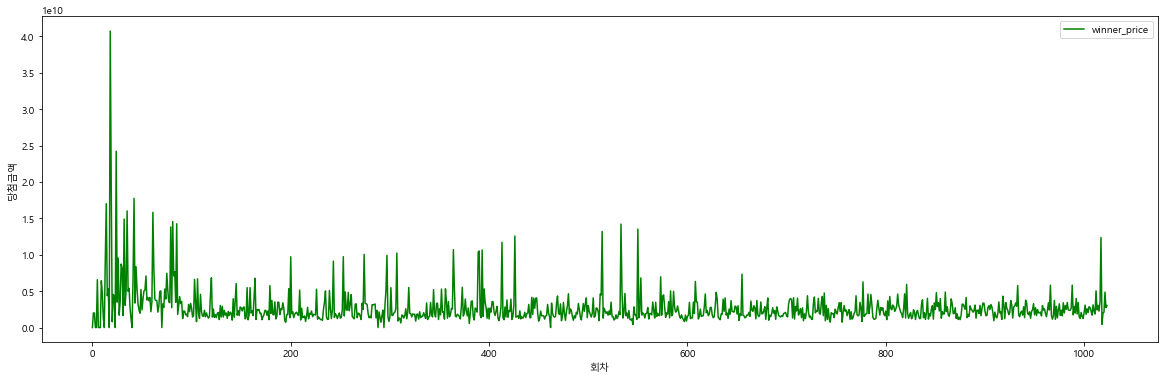

In [19]:
# 회차별 당첨금액
mpl.rcParams['font.family'] ='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] =False

lottery['winner_price'].plot(figsize=(20, 6), color='green')
plt.legend()
plt.ylabel('당첨금액')
plt.xlabel('회차')
plt.show()

## 번호 분석하기

- ### 최빈값 구하기 ver. 2022-07-20

In [20]:
# 번호별 당첨 번호 수 구하기
l1_cnt = lottery['Num1'].value_counts()
l2_cnt = lottery['Num2'].value_counts()
l3_cnt = lottery['Num3'].value_counts()
l4_cnt = lottery['Num4'].value_counts()
l5_cnt = lottery['Num5'].value_counts()
l6_cnt = lottery['Num6'].value_counts()
lb_cnt = lottery['bonus'].value_counts()

In [21]:
# 당첨번호 수 데이터프레임 만들기
join2 = pd.merge(l1_cnt, l2_cnt, left_index=True, right_index=True, how='outer')
join3 = pd.merge(join2, l3_cnt, left_index=True, right_index=True, how='outer')
join4 = pd.merge(join3, l4_cnt, left_index=True, right_index=True, how='outer')
join5 = pd.merge(join4, l5_cnt, left_index=True, right_index=True, how='outer')
join6 = pd.merge(join5, l6_cnt, left_index=True, right_index=True, how='outer')
join = pd.merge(join6, lb_cnt, left_index=True, right_index=True, how='outer')
df=join
df


,Num1,Num2,Num3,Num4,Num5,Num6,bonus
1,145.0,NaN,NaN,NaN,NaN,NaN,29
2,116.0,20.0,NaN,NaN,NaN,NaN,27
3,100.0,33.0,3.0,NaN,NaN,NaN,25
4,92.0,44.0,4.0,NaN,NaN,NaN,28
5,84.0,42.0,5.0,1.0,NaN,NaN,20
6,74.0,39.0,11.0,3.0,NaN,NaN,30
7,64.0,59.0,10.0,NaN,NaN,NaN,25
8,49.0,64.0,18.0,3.0,NaN,NaN,20
9,38.0,52.0,15.0,4.0,1.0,NaN,23
10,40.0,65.0,33.0,1.0,1.0,NaN,24


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


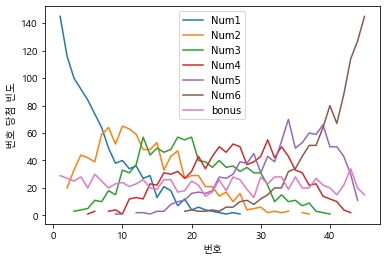

In [22]:
# 담청번호 빈도 그래프
for col in df.columns:
    df[col].plot()
plt.rcParams['font.family'] = 'NanumGothic'
plt.legend()
plt.xlabel('번호')
plt.ylabel('번호 당첨 빈도')
plt.show()

In [23]:
# 컬럼별 최빈값 도출

num1=[]
num2=[]

for col in lottery.columns[3:]:
    a=lottery[col].mode()
    if len(a)>1:
        for j in range(0, len(a)):
            num2.append(a[j])
        num1.append(list(num2))
    else:
        num1.append(a[0])
#print(num1)
#print(num2)
print('1번:', num1[0], '2번:', num1[1], '3번:', num1[2],  '4번:', num1[3], '5번:', num1[4], '6번:', num1[5], 'bonus:', num1[6])

1번: 1 2번: 10 3번: [13, 18, 20] 4번: 31 5번: 34 6번: 45 bonus: 43


- ### 로또 번호 추출 프로그램

참고사이트/블로그
https://www.google.com/search?q=%EB%A1%9C%EB%98%90+%EB%B2%88%ED%98%B8+%EB%B6%84%EC%84%9D+%ED%8C%8C%EC%9D%B4%EC%8D%AC&sxsrf=ALiCzsbgiiaXSIXNDKVXQ5eTR4uPnU9EQg%3A1658215651448&ei=41zWYpTuGt_V2roPqNaRoAs&ved=0ahUKEwjU6_XWtoT5AhXfqlYBHShrBLQQ4dUDCA4&uact=5&oq=%EB%A1%9C%EB%98%90+%EB%B2%88%ED%98%B8+%EB%B6%84%EC%84%9D+%ED%8C%8C%EC%9D%B4%EC%8D%AC&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEKIEMgUIABCiBDoHCAAQRxCwAzoECAAQDToICAAQHhAIEA06BAghEApKBAhBGABKBAhGGABQ1xRYrCpg2TBoAnABeACAAX6IAaMGkgEDMC43mAEAoAEByAEKwAEB&sclient=gws-wiz
https://stricky.tistory.com/158
https://keep-steady.tistory.com/23
https://data-newbie.tistory.com/743
https://somjang.tistory.com/entry/Python%EB%A1%9C%EB%98%90-api%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC-%EC%97%AD%EB%8C%80-%EB%A1%9C%EB%98%90-%EB%8B%B9%EC%B2%A8-%EA%B2%B0%EA%B3%BC-%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B0
https://superhky.tistory.com/192




